# Linear Regression (LR) Practice

In [1]:
#Importing Required Liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as me
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### TASK 1.1 : LOAD THE DATASET

In [2]:
# Loading Dataset

df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S2_Mtcars_Data_Practice.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### TASK 1.2 : PREPROCESS THE DATA THROUGH FEATURE SELECTION AND SPLITTING

In [3]:
print(df.info())  #No Categorical Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


In [4]:
df.isnull().sum()     #No Null Values

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [5]:
# Feature Scaling

def feature_scaling(scale):
    new_df=df.select_dtypes(exclude=['object','category'])
    if scale=='minmax':
        scalar=preprocessing.MinMaxScaler()
    else:
        scalar=preprocessing.StandardScaler()
    df_scale=pd.DataFrame(scalar.fit_transform(new_df),columns=new_df.columns)
    return df_scale

final_df=feature_scaling('minmax')
final_df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571
1,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571
2,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000
3,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000
4,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857


In [6]:
# Feature Selection 

final_df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<AxesSubplot:>

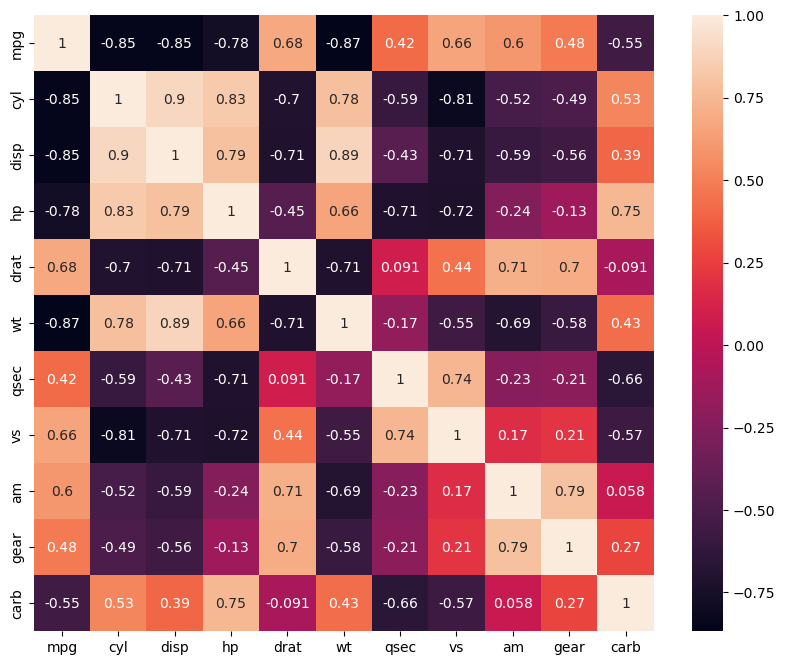

In [24]:
plt.figure(figsize=(10,8))
sb.heatmap(final_df.corr(),annot=True)

### TASK 1.3 : VISUALIZE THE DATA AS A PAIR PLOT

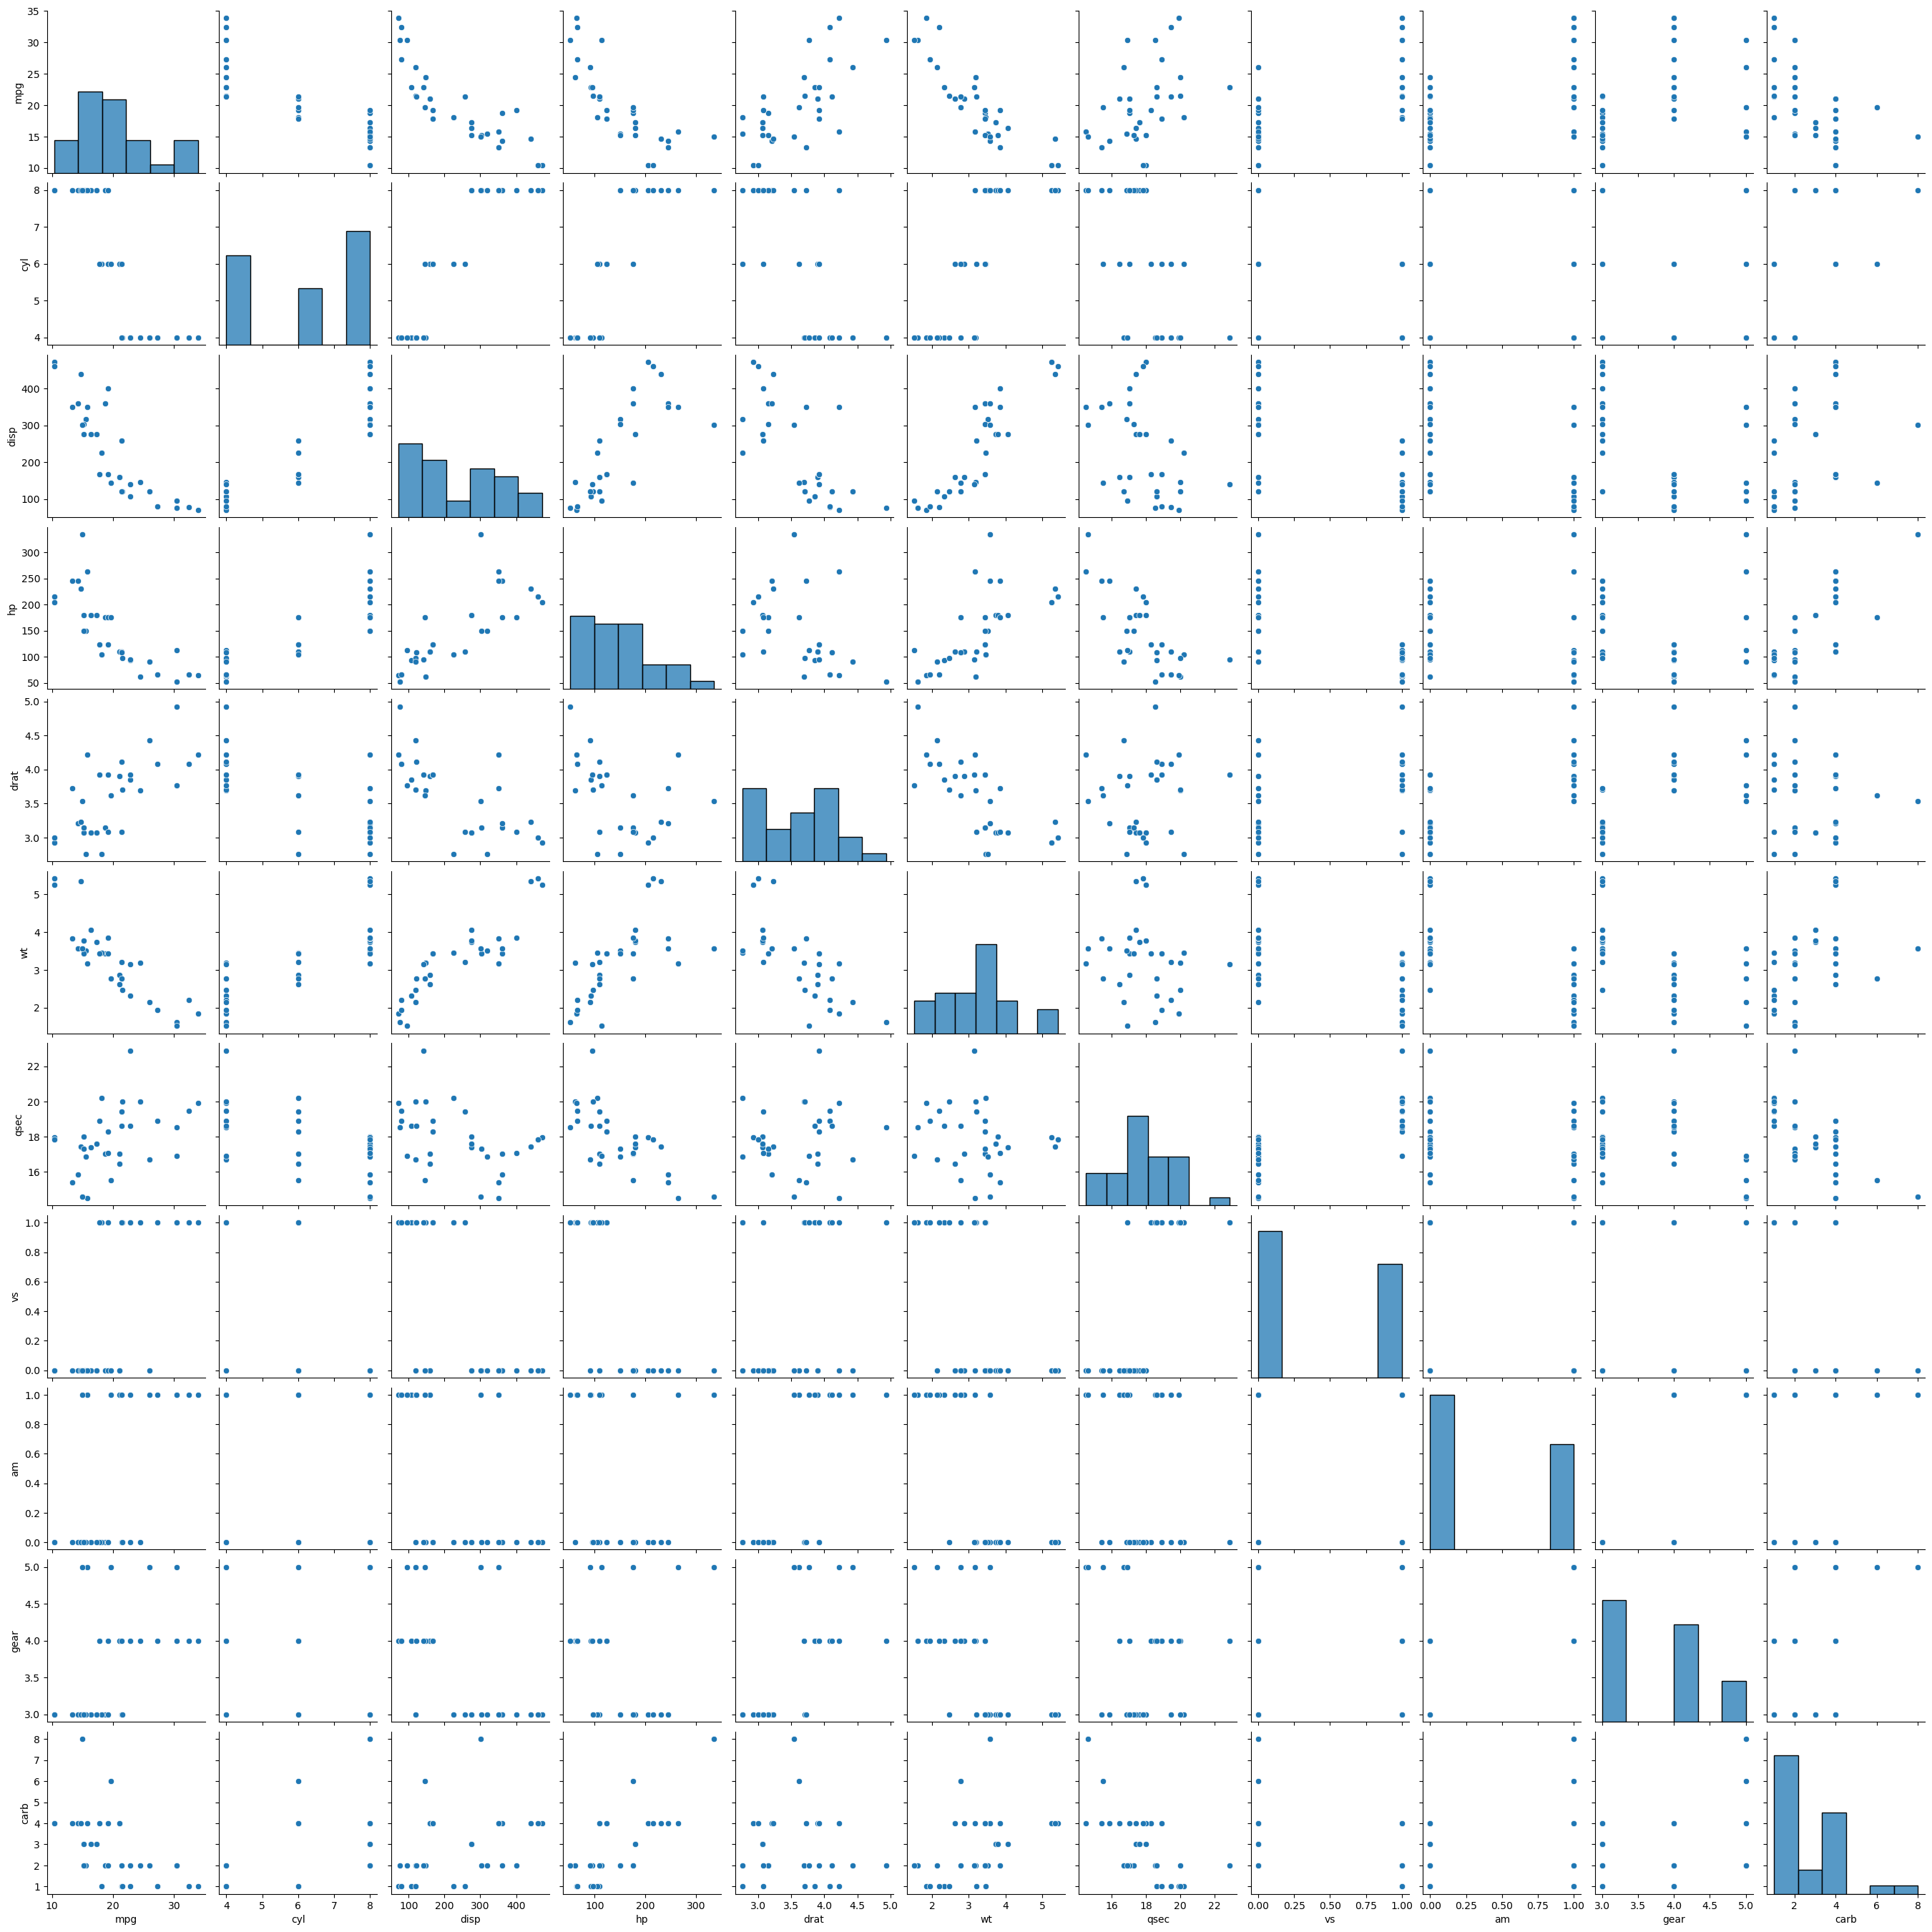

In [8]:
sb.pairplot(df)

### TASK 2.1 : BUILD A SIMPLE LINEAR MODEL WITH ONLY ONE INDEPENDENT FEATURE

In [9]:
X=df[['disp']]
y=df[['mpg']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
LR=LinearRegression().fit(X_train,y_train)

### TASK 2.2 : EVALUATE INTERCEPT,SLOPE AND R SQUARE VALUE

In [10]:
print('Intercept : ',LR.intercept_)
print('Slope : ',LR.coef_)
print('R Square : ',LR.score(X_train,y_train))

Intercept :  [29.04021623]
Slope :  [[-0.03836371]]
R Square :  0.7136849612180783


### TASK 2.3: WRITE THE LINEAR EQUATION OF THE MODEL USING INTERCEPT AND SLOPE

In [11]:
# y=29.04021623X-0.03836371
# mpg=29.04021623(disp)-0.03836371

### TASK 2.4: EVALUATE THE MODEL BY CALCULATING MSE,RMSE VALUES

In [12]:
pred_y=LR.predict(X_test)
MSE=mean_squared_error(pred_y,y_test)
print('MSE :',MSE)
RMSE=mean_squared_error(pred_y,y_test,squared=False)
print('RMSE :',RMSE)
MAE=mean_absolute_error(pred_y,y_test)
print('MAE : ',MAE)

MSE : 10.773880468059584
RMSE : 3.2823589791580665
MAE :  2.8030435676388956


## TASK 2.5: FIT A LINEAR REGRESSION MODEL TO THE DATASET(LINE PLOT) AND VISUALIZE IT WITH DATA

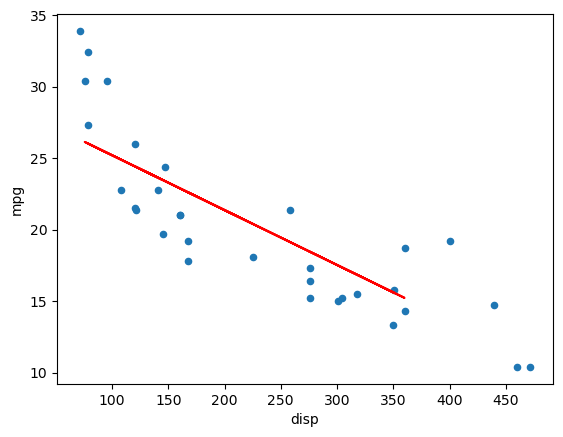

In [13]:
fig,ax=plt.subplots()
df.plot.scatter(x='disp',y='mpg',ax=ax)
plt.plot(X_test.squeeze(),pred_y.squeeze(),color='r')
plt.show()

### TASK 3.1: REBUILD THE LINEAR MODEL WITH ONE MORE INDEPENDANT FEATURE

In [14]:
X=df[['disp','cyl']]
y=df[['mpg']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
LR=LinearRegression().fit(X_train,y_train)

### TASK 3.2 : EVALUATE INTERCEPT,SLOPE AND R SQUARE VALUE

In [15]:
print('Intercept : ',LR.intercept_)
print('Slope : ',LR.coef_)
print('R Square : ',LR.score(X_train,y_train))

Intercept :  [32.36060295]
Slope :  [[-0.02449051 -1.07461396]]
R Square :  0.7354641449123803


### TASK 3.3: WRITE THE LINEAR EQUATION OF THE MODEL USING INTERCEPT AND SLOPE

In [16]:
# y=32.36060295-0.02449051 X1 -1.07461396 X2
# mpg=32.36060295-0.02449051 disp -1.07461396 cyl

### TASK 3.4: EVALUATE THE MODEL BY CALCULATING MSE,RMSE VALUES

In [17]:
pred_y=LR.predict(X_test)
print("MSE  : ",mean_squared_error(y_test,pred_y))
print("RMSE  : ",mean_squared_error(y_test,pred_y,squared=False))
print("MAE  : ",mean_absolute_error(y_test,pred_y))

MSE  :  8.187715846865999
RMSE  :  2.861418502572806
MAE  :  2.2996991189375073


Text(0.5, 0.5, 'mpg')

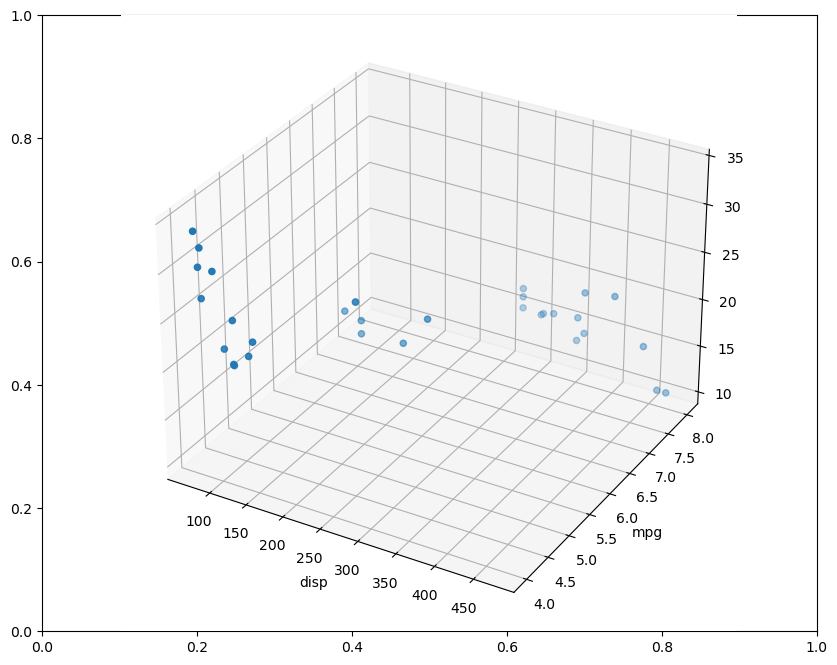

In [18]:
x=df[['disp','cyl']].values.reshape(-1,2)
x1=x[:,0]
x2=x[:,1]
y=df['mpg']
fig=plt.subplots(figsize=(10,8))
ax=plt.axes(projection='3d')
ax.grid(b=True,color='grey',linestyle='--',alpha=0.2)
ax.scatter3D(x1,x2,y)
ax.set_xlabel('disp')
ax.set_ylabel('cyl')
ax.set_ylabel('mpg')

### TASK 4.1: REBUILD THE LINEAR MODEL WITH ONE MORE INDEPENDANT FEATURE

In [19]:
X=df[['disp','cyl','vs']]
y=df['mpg']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
LR=LinearRegression().fit(X_train,y_train)

### TASK 4.2 : EVALUATE INTERCEPT,SLOPE AND R SQUARE VALUE

In [20]:
print('Intercept : ',LR.intercept_)
print('Slope : ',LR.coef_)
print('R Square : ',LR.score(X_train,y_train))

Intercept :  34.06786511834808
Slope :  [-0.02427285 -1.2956676  -0.82349487]
R Square :  0.7361309914813862


### TASK 4.3: WRITE THE LINEAR EQUATION OF THE MODEL USING INTERCEPT AND SLOPE

In [21]:
# y=34.06786511834808-0.02427285 X1 -1.2956676 X2 -0.82349487 X3
# mpg=34.06786511834808-0.02427285 disp -1.2956676 cyl - 0.82349487 vs

### TASK 4.4: EVALUATE THE MODEL BY CALCULATING MSE,RMSE VALUES

In [22]:
pred_y=LR.predict(X_test)
print("MSE  : ",mean_squared_error(y_test,pred_y))
print("RMSE  : ",mean_squared_error(y_test,pred_y,squared=False))
print("MAE  : ",mean_absolute_error(y_test,pred_y))

MSE  :  8.050820504721823
RMSE  :  2.8373967830956994
MAE  :  2.2144480115839493


### TASK 4.5: DISCUSS FINDINGS FROM THE METRICS AND R2 VALUES OF DIFFERENT MODELS

In [ ]:
#The closer MSE,RMSE and MSE value is to 0, the more accurate model is. In Model 3 (Task 3) MSE,RMSE and MSE values are lower. Hence Model is more accurate.
#Similarly greater the R2 value, the more accurate model is. In Model 3 (Task 3) R2 value is lower. Hence Model is more accurate.